矩形脉冲波形的占空比

此示例说明如何创建矩形脉冲波形并测量其占空比。您可以将矩形脉冲波形想象成一系列的开启和关闭状态。一个脉冲周期是一个开启和关闭状态的总持续时间。脉冲宽度是开启状态的持续时间。占空比是脉冲宽度与脉冲周期的比率。矩形脉冲的占空比描述脉冲处于开启状态的时间占一个脉冲周期的比率。

创建一个以 1 千兆赫采样的矩形脉冲。脉冲处于开启状态（即等于 1），持续时间为 1 微秒。如果脉冲处于关闭状态（即等于 0），持续时间为 3 微秒。脉冲周期为 4 微秒。绘制波形。

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fs = 1e9
T = 4e-6
t = np.arange(0, 10*T, 1/fs)
width = 1e-6

pulsewidth = 1e-6
pulseperiod = np.arange(0, 11, 1)
pulseperiods = 4e-6 * pulseperiod

In [3]:
def rect_wav(x, width, T):
    period = x % T
    if period < width:
        r = 1
    else:
        r = 0
    return r

In [4]:
y = np.array([rect_wav(x, width, T) for x in t])

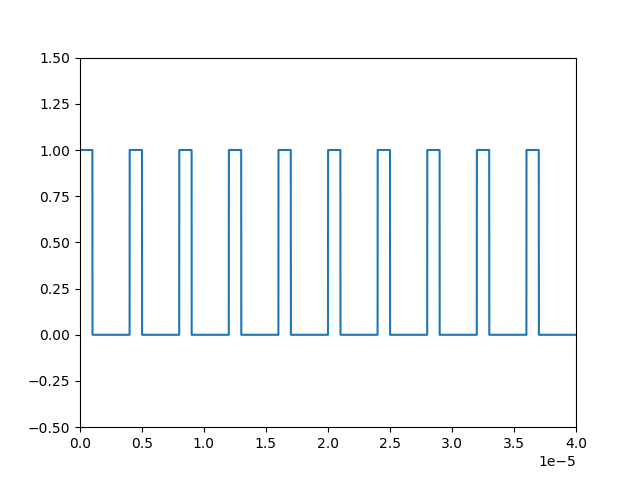

In [5]:
plt.plot(t, y)
plt.axis([0, 4e-5, -0.5, 1.5])
plt.show()

使用 dutycycle 确定波形的占空比。输入脉冲波形和采样率以输出占空比。dutycycle 为每个检测到的脉冲输出占空比值。

In [6]:
def dutycycle(x, T, fs):
    l = int(len(x)/fs//T)
    samples = int(len(x) / l)
    D = np.zeros(l)
    for i in range (l):
        T0 = x[i * samples:(i + 1) * samples]
        D[i] = np.sum(T0 == 1)/len(T0)
    return D

在此示例中，每个检测到的脉冲的占空比是相同的，都等于 0.25。这是预期的占空比，因为脉冲在每 4 微秒的周期内开启 1 微秒，关闭 3 微秒。因此，脉冲在每个周期的 1/4 内处于开启状态。以百分比表示，这等于 25% 的占空比。

In [7]:
D = dutycycle(y, T, fs)
print(D)

[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]


使用相同的采样率和脉冲周期，以循环方式将脉冲开启时间（脉冲宽度）从 1 微秒更改到 3 微秒，并计算占空比。绘制循环中每步的脉冲波形，并在绘图标题中显示占空比值。占空比随着脉冲宽度的增加从 0.25 (1/4) 增加到 0.75 (3/4)。

1
2
3


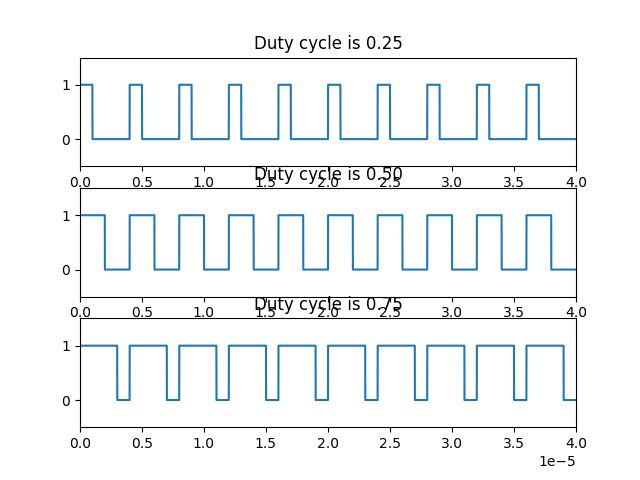

In [8]:
compare = np.array([1, 2, 3])
com = np.zeros([3, len(t)])
for i in compare:
    print(i)
    com[i-1] = np.array([rect_wav(x, i * width, T) for x in t])
    
    plt.subplot(3,1,i)
    plt.plot(t, com[i-1])
    plt.axis([0, 4e-5, -0.5, 1.5])
    
    D = dutycycle(com[i-1], T, fs)
    plt.title('Duty cycle is %.2f' %np.mean(D))
plt.show()